In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
import statsmodels.api as smd
import scipy.stats as st
import sklearn
import matplotlib.pyplot as plt

In [2]:
#importing the dataset 
dataset=pd.read_csv("C:/Users/Admin/Documents/BasicScore.csv")

In [3]:
# shows count of rows and columns
dataset.shape

(199290, 11)

In [4]:
#shows first few rows of the code
dataset.head()

,insured_username,insured,snapshot_date,name,score,measure,peer_group,display_text,is_alert,has_serious_vio,above_threshold
0,2162612,ARC TRANSPORT INC,30/4/21,Unsafe Driving,50.0,4.59090,1.0,0.5,False,False,False
1,2162612,ARC TRANSPORT INC,28/5/21,Unsafe Driving,48.0,4.36363,1.0,0.48,False,False,False
2,2162612,ARC TRANSPORT INC,25/6/21,Unsafe Driving,52.0,4.88888,1.0,0.52,False,False,False
3,2162612,ARC TRANSPORT INC,30/7/21,Unsafe Driving,52.0,4.88888,1.0,0.52,False,False,False
4,2162612,ARC TRANSPORT INC,27/8/21,Unsafe Driving,49.0,4.61111,1.0,0.49,False,False,False


In [5]:
#dropping INSUREDNAME column and insured_username column from the dataset
dataset=dataset.drop('insured',axis=1)
dataset=dataset.drop('insured_username',axis=1)
dataset=dataset.drop('snapshot_date',axis=1)
dataset=dataset.drop('name',axis=1)
dataset.shape

(199290, 7)

In [6]:
dataset.head()

,score,measure,peer_group,display_text,is_alert,has_serious_vio,above_threshold
0,50.0,4.59090,1.0,0.5,False,False,False
1,48.0,4.36363,1.0,0.48,False,False,False
2,52.0,4.88888,1.0,0.52,False,False,False
3,52.0,4.88888,1.0,0.52,False,False,False
4,49.0,4.61111,1.0,0.49,False,False,False


In [7]:
# explore missing values
dataset.isna().sum()

score              92239
measure            43745
peer_group         99347
display_text          49
is_alert               0
has_serious_vio        0
above_threshold        0
dtype: int64

In [8]:
dataset = dataset.dropna()

In [9]:
dataset.isna().sum()

score              0
measure            0
peer_group         0
display_text       0
is_alert           0
has_serious_vio    0
above_threshold    0
dtype: int64

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76436 entries, 0 to 199286
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   score            76436 non-null  float64
 1   measure          76436 non-null  float64
 2   peer_group       76436 non-null  float64
 3   display_text     76436 non-null  object 
 4   is_alert         76436 non-null  bool   
 5   has_serious_vio  76436 non-null  bool   
 6   above_threshold  76436 non-null  bool   
dtypes: bool(3), float64(3), object(1)
memory usage: 3.1+ MB


In [11]:
# Check the corr values of final list of variables
cor = dataset.corr()
cor

,score,measure,peer_group,is_alert,has_serious_vio,above_threshold
score,1.000000,0.609731,0.266992,0.724201,0.101088,0.729839
measure,0.609731,1.000000,-0.095416,0.404780,0.025127,0.409288
peer_group,0.266992,-0.095416,1.000000,0.227123,0.055035,0.226866
is_alert,0.724201,0.404780,0.227123,1.000000,0.187809,0.991168
has_serious_vio,0.101088,0.025127,0.055035,0.187809,1.000000,0.119017
above_threshold,0.729839,0.409288,0.226866,0.991168,0.119017,1.000000


In [12]:
dataset=dataset.drop(["is_alert"],1)
dataset=dataset.drop(["display_text"],1)
dataset=dataset.drop(["peer_group"],1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11320\412275717.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset=dataset.drop(["is_alert"],1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11320\412275717.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset=dataset.drop(["display_text"],1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11320\412275717.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset=dataset.drop(["peer_group"],1)


In [13]:
#Converting all true values to 1 and false values to 0
dataset.above_threshold=dataset.above_threshold.astype(int)
dataset.has_serious_vio=dataset.has_serious_vio.astype(int)

In [14]:
dataset.head(15)

,score,measure,has_serious_vio,above_threshold
0,50.0,4.59090,0,0
1,48.0,4.36363,0,0
2,52.0,4.88888,0,0
3,52.0,4.88888,0,0
4,49.0,4.61111,0,0
5,39.0,3.55555,0,0
6,26.0,2.47826,0,0
7,22.0,2.13043,0,0
8,25.0,2.31578,0,0
9,25.0,2.31578,0,0


In [15]:
dataset.above_threshold.value_counts()

0    56566
1    19870
Name: above_threshold, dtype: int64

In [16]:
X = dataset.loc[:, dataset.columns != 'above_threshold']

In [17]:
y = dataset.above_threshold

In [18]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [19]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

In [20]:
X_res.shape,y_res.shape

((112506, 3), (112506,))

In [21]:
# splitting dataset into training and test (in ratio 80:20)
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

In [22]:
X_res_train

,score,measure,has_serious_vio
33478,8.0,1.09636,0
4726,29.0,0.26041,0
45769,0.0,0.00000,0
52803,33.0,2.92718,0
26677,44.0,0.20000,0
...,...,...,...
21243,19.0,1.78390,0
45891,0.0,0.00000,0
42613,78.0,6.30063,0
43567,0.0,0.00000,0


In [23]:
## standardizing the dataset
scaler = StandardScaler()

X_res_train[['score','measure']] = scaler.fit_transform(X_res_train[['score','measure']])

X_res_train.head()

,score,measure,has_serious_vio
33478,-1.416634,-0.496304,0
4726,-0.788233,-0.721001,0
45769,-1.656025,-0.790997,0
52803,-0.668537,-0.004195,0
26677,-0.339375,-0.737239,0


In [24]:
from statsmodels.tools import add_constant as add_constant
X_res_train_constant = add_constant(X_res_train)
X_res_train_constant.head()

,const,score,measure,has_serious_vio
33478,1.0,-1.416634,-0.496304,0
4726,1.0,-0.788233,-0.721001,0
45769,1.0,-1.656025,-0.790997,0
52803,1.0,-0.668537,-0.004195,0
26677,1.0,-0.339375,-0.737239,0


In [26]:
logreg = LogisticRegression()
logreg.fit(X_res_train, y_res_train)

LogisticRegression()

In [27]:
y_train_pred = logreg.predict(X_res_train)

In [28]:
print(confusion_matrix(y_res_train,y_train_pred))

[[42280  2762]
 [ 1367 43595]]


In [29]:
print(accuracy_score(y_res_train, y_train_pred))

0.9541242611439491


In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_res_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     45042
           1       0.94      0.97      0.95     44962

    accuracy                           0.95     90004
   macro avg       0.95      0.95      0.95     90004
weighted avg       0.95      0.95      0.95     90004



[[9.99999981e-01 1.86446629e-08]
 [9.99982385e-01 1.76149907e-05]
 [9.99999998e-01 2.04380227e-09]
 ...
 [5.81668180e-02 9.41833182e-01]
 [9.99999998e-01 2.04380227e-09]
 [9.99999998e-01 2.04380227e-09]]
Logistic: ROC AUC = 0.990


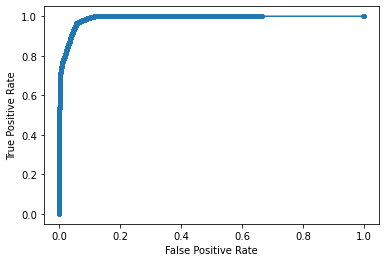

In [32]:
#Performance Metrics AUC, ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

lr_probs=logreg.predict_proba(X_res_train)
print(lr_probs)


lr_probs = lr_probs[:, 1]


lr_auc = roc_auc_score(y_res_train, lr_probs)


print('Logistic: ROC AUC = %.3f' % (lr_auc))


lr_fpr, lr_tpr, _ = roc_curve(y_res_train, lr_probs)

plt.plot(lr_fpr, lr_tpr, marker='.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()